## **Parte 1**: Entrenamiento Incremental

Comprender los Datos: Antes de entrenar cualquier modelo, es esencial realizar un análisis exploratorio de los datos (EDA) para familiarizarse con las características del conjunto de datos. Esto implica examinar visualizaciones, identificar correlaciones entre variables y comprender la distribución de las clases de transacciones (normales y fraudulentas).

Mejora de Características: El proceso de mejora de características, conocido como feature engineering, desempeña un papel crucial en la construcción de modelos efectivos. Esto implica la exploración y creación de nuevas características a partir de las existentes, como variables temporales (por ejemplo, hora del día, día de la semana), estadísticas agregadas (como la frecuencia de transacciones por cliente) y otras características relevantes. Además, la normalización o estandarización de las características puede ser necesaria según el algoritmo de aprendizaje utilizado.

Abordar el Desequilibrio de Datos: Dado que los conjuntos de datos de transacciones financieras suelen estar desequilibrados, es importante aplicar técnicas para manejar este desequilibrio. Esto puede incluir el uso de técnicas de muestreo, como oversampling o undersampling, así como la generación de datos sintéticos mediante métodos como SMOTE (Synthetic Minority Over-sampling Technique).

Optimización de Hiperparámetros: Experimentar con la optimización de hiperparámetros es fundamental para mejorar el rendimiento de los modelos. Esto implica ajustar los parámetros del modelo para maximizar su rendimiento predictivo.

Implementar Early Stopping: La implementación de early stopping en modelos de aprendizaje profundo es una estrategia importante para prevenir el sobreajuste y reducir el tiempo de entrenamiento. Esta técnica ayuda a detener el proceso de entrenamiento cuando el rendimiento del modelo deja de mejorar en un conjunto de datos de validación separado.

Evaluación de Métricas Adecuadas: Para evaluar el rendimiento del modelo en el contexto de datos desequilibrados, es importante utilizar métricas específicas que tengan en cuenta la naturaleza de los datos. Métricas como el área bajo la curva ROC (ROC-AUC) o la curva precisión-recall son más adecuadas para evaluar modelos en presencia de desequilibrio de clases, ya que proporcionan una imagen más completa del rendimiento del modelo.

**Análisis exploratorio**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('fraud_feature_engineering_example.csv')

Encabezados del dataset

In [65]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


Descripción estadística del dataset

In [66]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

Histograma de la variable "amt"

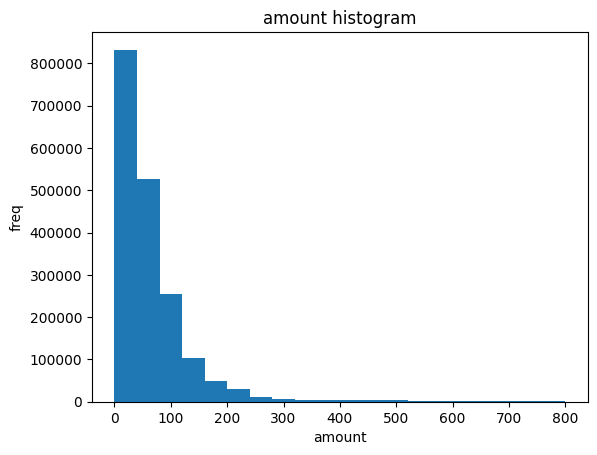

In [67]:
bin_range = (0, 800)

plt.hist(df['amt'], bins=20, range=bin_range)
plt.xlabel('amount')
plt.ylabel('freq')
plt.title('amount histogram')
plt.show()

Gráfico de barras para la variable category

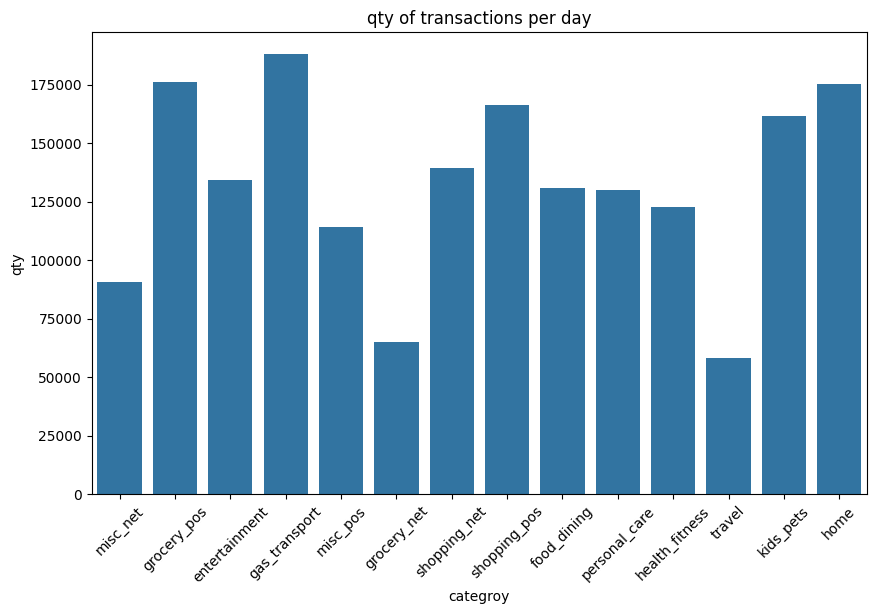

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=45)
plt.xlabel('categroy')
plt.ylabel('qty')
plt.title('qty of transactions per day')
plt.show()

Gráfico de dispersión de 'amt' vs 'amt_year' con colores según 'is_fraud'

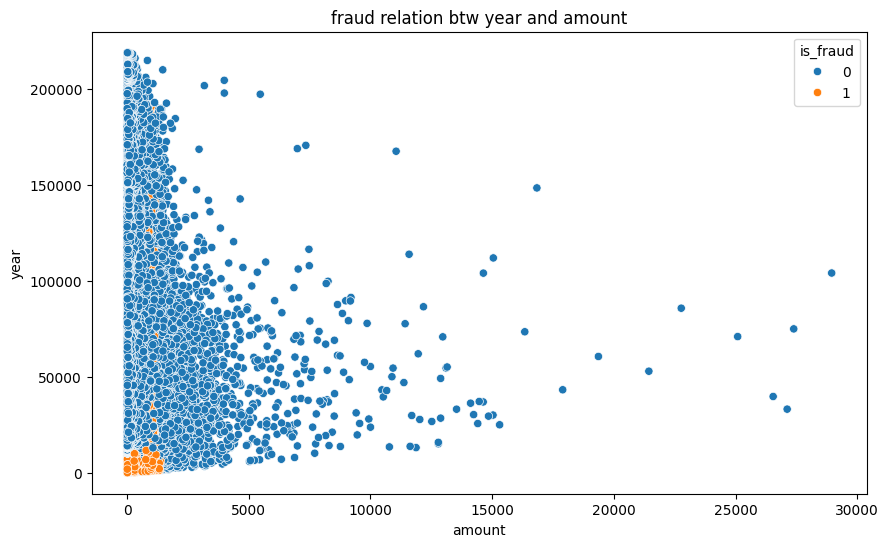

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_year', hue='is_fraud', data=df)
plt.xlabel('amount')
plt.ylabel('year')
plt.title('fraud relation btw year and amount')
plt.show()

Visualizando las correlaciones del dataset

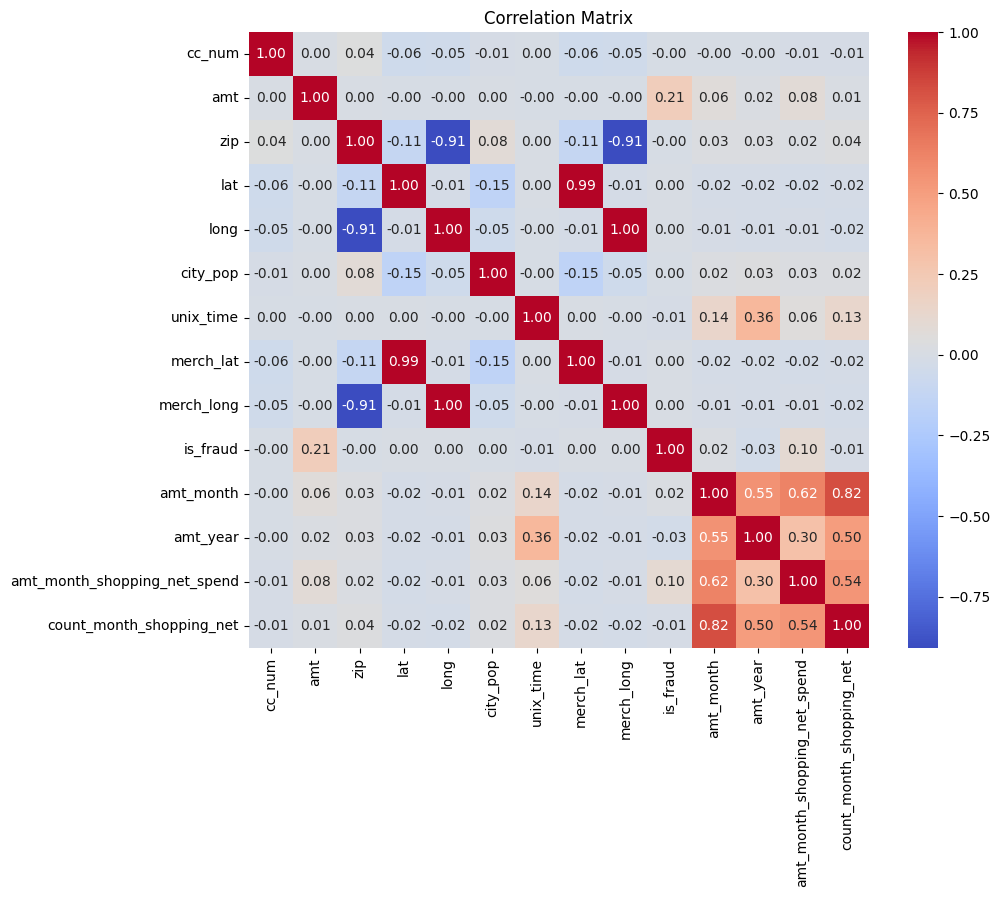

In [70]:

numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Visualización de la distribución de las clases para verificar si hay desbalances en el dataset.

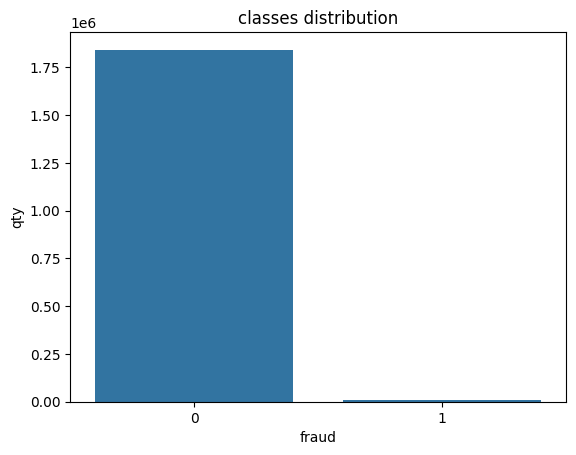

In [71]:
sns.countplot(x='is_fraud', data=df)
plt.xlabel('fraud')
plt.ylabel('qty')
plt.title('classes distribution')
plt.show()

Exploración de variables categóricas

'category' vs 'is_fraud':
is_fraud             0     1
category                    
entertainment   133826   292
food_dining     130524   205
gas_transport   187257   772
grocery_net      64703   175
grocery_pos     173963  2228
health_fitness  122368   185
home            175195   265
kids_pets       161423   304
misc_net         89472  1182
misc_pos        113907   322
personal_care   129795   290
shopping_net    137103  2219
shopping_pos    165407  1056
travel           57800   156


<Figure size 1000x600 with 0 Axes>

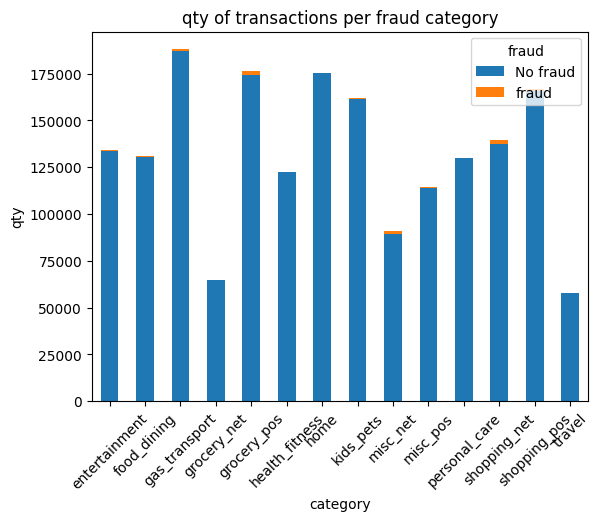

Tabla de frecuencia de la variable 'merchant':
                                  Merchant  Frequency
0                        fraud_Kilback LLC       6262
1                        fraud_Cormier LLC       5246
2                         fraud_Schumm PLC       5195
3                           fraud_Kuhn LLC       5031
4                          fraud_Boyer PLC       4999
..                                     ...        ...
688    fraud_Douglas, DuBuque and McKenzie       1101
689                     fraud_Treutel-King       1098
690                 fraud_Satterfield-Lowe       1095
691     fraud_Hahn, Douglas and Schowalter       1091
692  fraud_Ritchie, Bradtke and Stiedemann       1090

[693 rows x 2 columns]


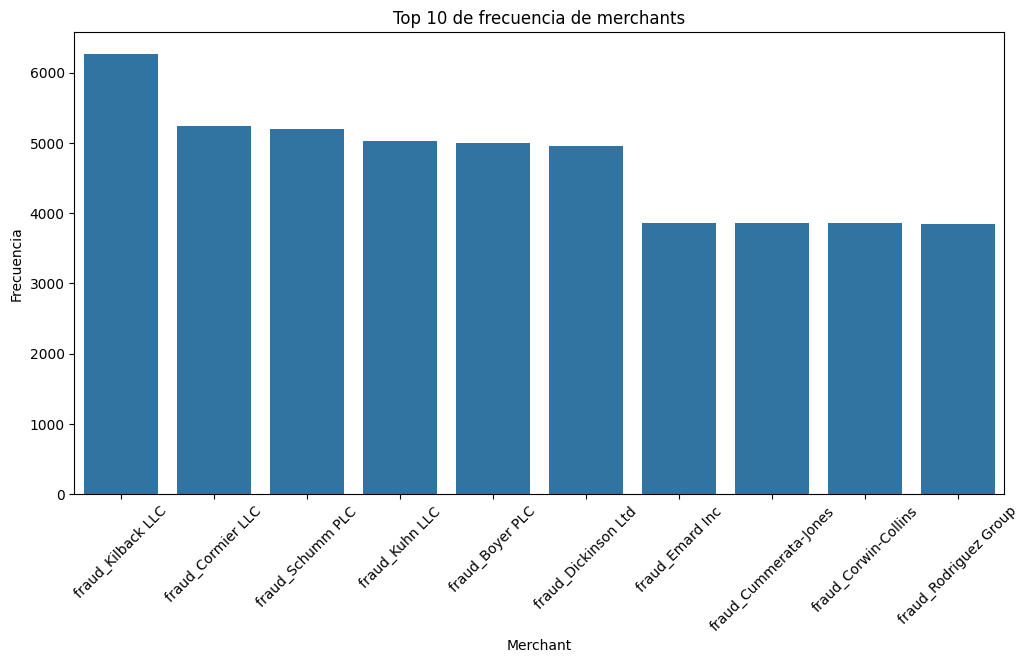

In [72]:

contingency_table = pd.crosstab(df['category'], df['is_fraud'])
print("'category' vs 'is_fraud':")
print(contingency_table)
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('category')
plt.ylabel('qty')
plt.title('qty of transactions per fraud category')
plt.xticks(rotation=45)
plt.legend(title='fraud', labels=['No fraud', 'fraud'])
plt.show()

merchant_freq = df['merchant'].value_counts().reset_index()
merchant_freq.columns = ['Merchant', 'Frequency']
print("Tabla de frecuencia de la variable 'merchant':")
print(merchant_freq)

top_merchants = merchant_freq.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant', y='Frequency', data=top_merchants)
plt.xlabel('Merchant')
plt.ylabel('Frecuencia')
plt.title('Top 10 de frecuencia de merchants')
plt.xticks(rotation=45)
plt.show()

Análisis temporal

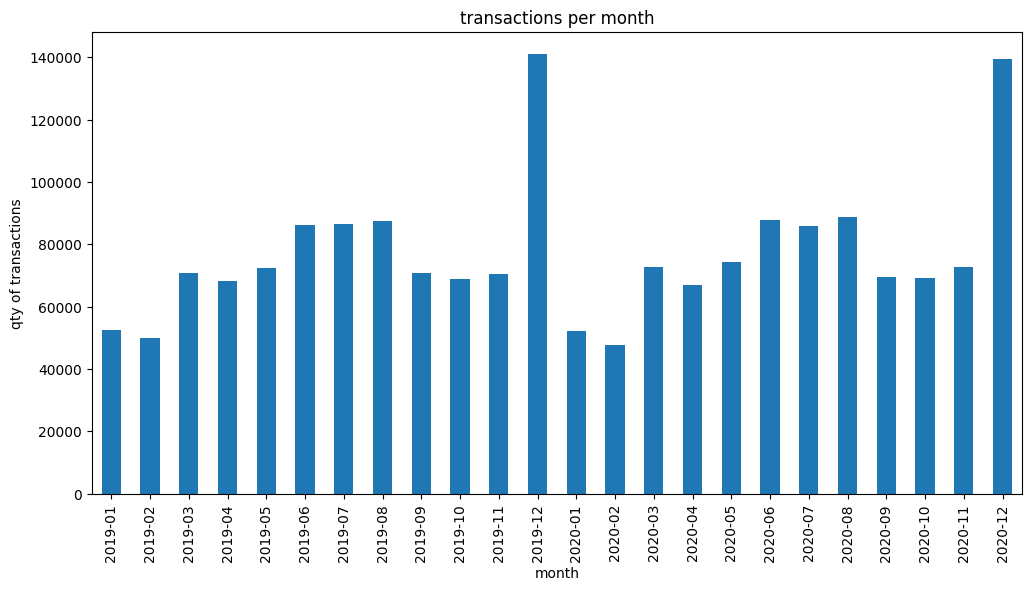

In [73]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
transactions_by_month = df.groupby(df['trans_date_trans_time'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('qty of transactions')
plt.title('transactions per month')
plt.show()

Analisis de variables relacionadas geograficamente

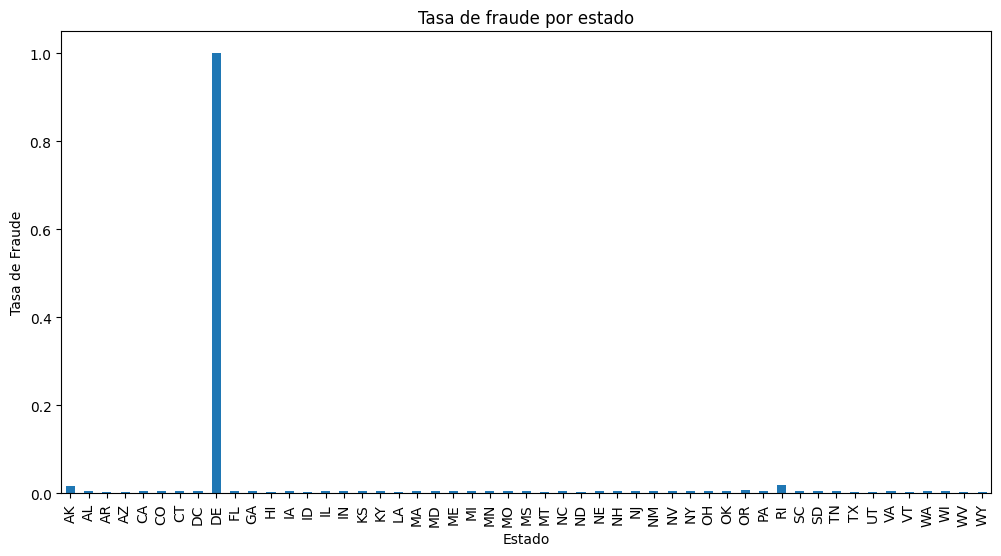

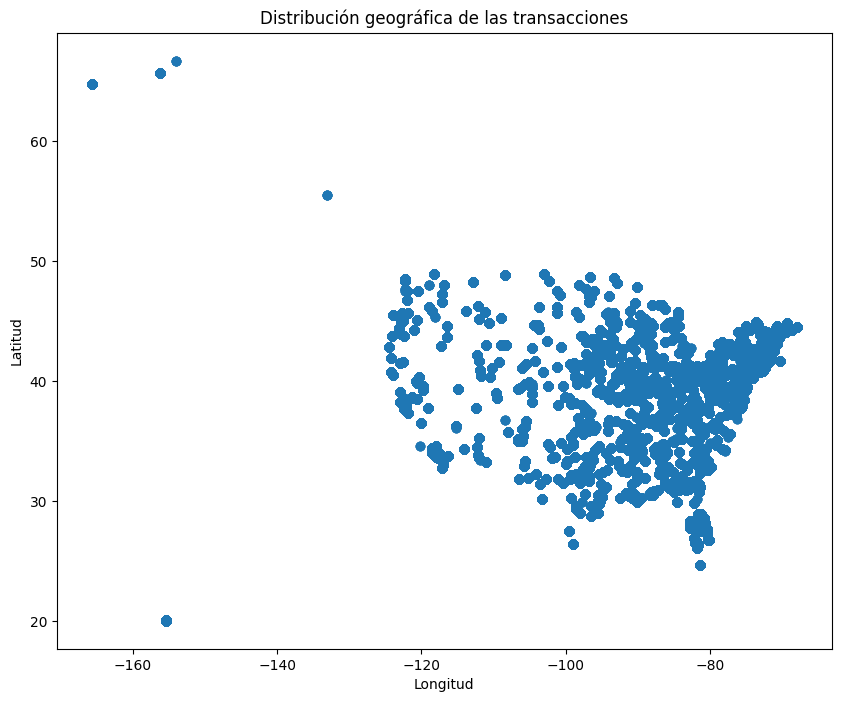

In [74]:
import matplotlib.pyplot as plt

fraud_by_state = df.groupby('state')['is_fraud'].mean()
fig, ax2 = plt.subplots(figsize=(12, 6))
fraud_by_state.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Estado')
ax2.set_ylabel('Tasa de Fraude')
ax2.set_title('Tasa de fraude por estado')

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(df['long'], df['lat'], alpha=0.5)
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Distribución geográfica de las transacciones')


plt.show()

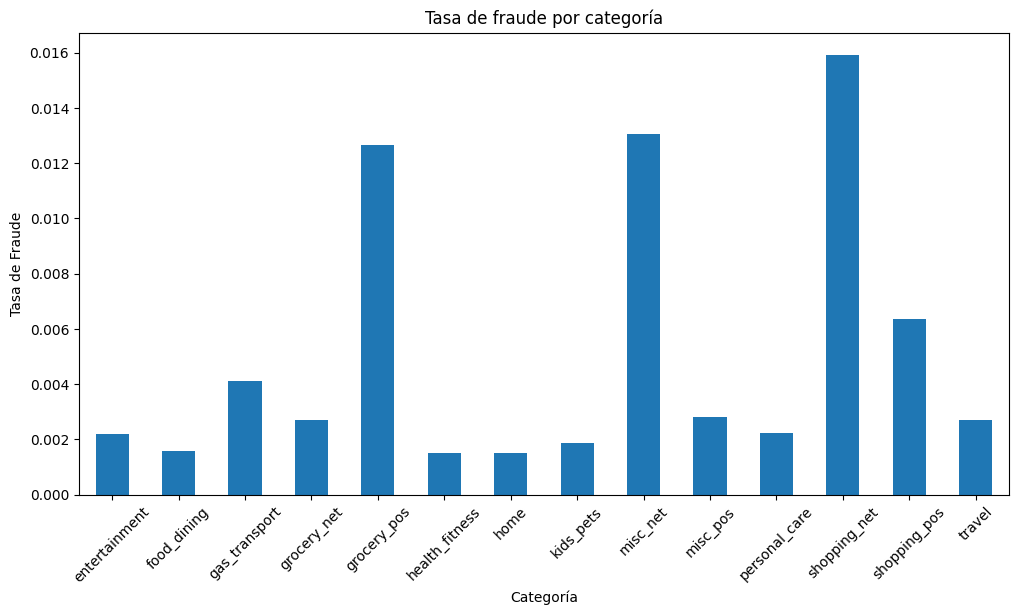

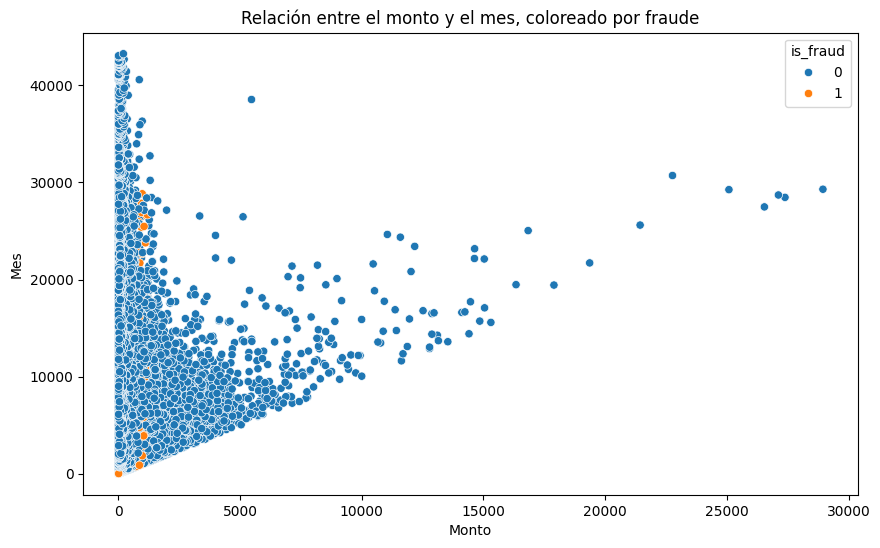

In [75]:
fraud_by_category = df.groupby('category')['is_fraud'].mean()
plt.figure(figsize=(12, 6))
fraud_by_category.plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Tasa de Fraude')
plt.title('Tasa de fraude por categoría')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_month', hue='is_fraud', data=df)
plt.xlabel('Monto')
plt.ylabel('Mes')
plt.title('Relación entre el monto y el mes, coloreado por fraude')
plt.show()


                          amt  is_fraud
trans_date_trans_time                  
2019-01-01 00:00:18      4.97         0
2019-01-01 00:00:44    107.23         0
2019-01-01 00:00:51    220.11         0
2019-01-01 00:01:16     45.00         0
2019-01-01 00:03:06     41.96         0


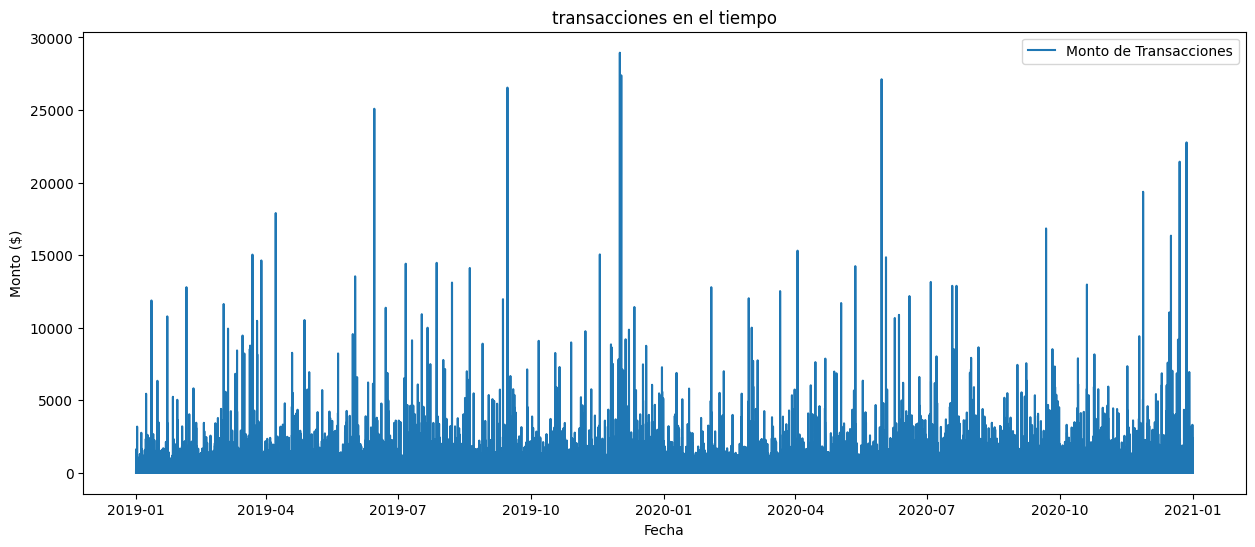

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df_procesado = pd.read_csv('./new_data/dataset_clean.csv')

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionar las columnas relevantes para el análisis de series de tiempo
df_time_Series = df_procesado[['trans_date_trans_time', 'amt', 'is_fraud']]

# Configurar la columna de fecha como el índice del DataFrame
df_time_Series.set_index('trans_date_trans_time', inplace=True)

# Asegurarse de que los datos están ordenados por fecha
df_time_Series.sort_index(inplace=True)

# Mostrar las primeras filas del DataFrame
print(df_time_Series.head())
plt.figure(figsize=(15, 6))
plt.plot(df_time_Series.index, df_time_Series['amt'], label='Monto de Transacciones')
plt.xlabel('Fecha')
plt.ylabel('Monto ($)')
plt.title('transacciones en el tiempo')
plt.legend()
plt.show()

Resampleo para visualizar transacciones fraudelntas vs no fraudulentas

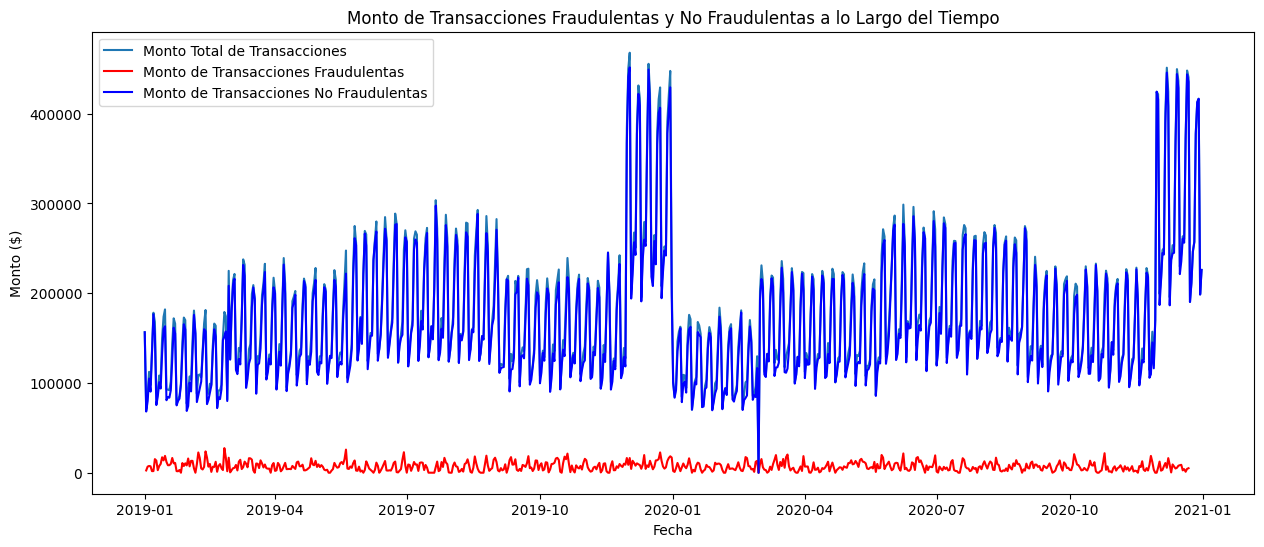

In [77]:
# Resamplear los datos para obtener sumas diarias
df_daily = df_time_Series.resample('D').sum()

# Separar transacciones fraudulentas y no fraudulentas
df_fraude = df_time_Series[df_time_Series['is_fraud'] == 1].resample('D').sum()
df_no_fraude = df_time_Series[df_time_Series['is_fraud'] == 0].resample('D').sum()

plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['amt'], label='Monto Total de Transacciones')
plt.plot(df_fraude.index, df_fraude['amt'], label='Monto de Transacciones Fraudulentas', color='r')
plt.plot(df_no_fraude.index, df_no_fraude['amt'], label='Monto de Transacciones No Fraudulentas', color='b')
plt.xlabel('Fecha')
plt.ylabel('Monto ($)')
plt.title('Monto de Transacciones Fraudulentas y No Fraudulentas a lo Largo del Tiempo')
plt.legend()
plt.show()

Características de tiempo

In [78]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [79]:
#Frecuencia de transacciones por cliente
transaction_frequency = df.groupby('cc_num').size().reset_index(name='transaction_frequency')
df = pd.merge(df, transaction_frequency, on='cc_num', how='left')

#Calculo de monto promedio por transaccion
average_transaction_amount = df.groupby('cc_num')['amt'].mean().reset_index(name='average_transaction_amount')
df = pd.merge(df, average_transaction_amount, on='cc_num', how='left')

#Rastreo de comersios visitados
unique_merchants_visited = df.groupby('cc_num')['merchant'].nunique().reset_index(name='unique_merchants_visited')
df = pd.merge(df, unique_merchants_visited, on='cc_num', how='left')

ruta = "./new_data/"
df.to_csv(ruta + 'dataset_clean.csv', index=False)


In [80]:
df_procesado = pd.read_csv('./new_data/dataset_clean.csv')

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Asumimos que df_procesado es el DataFrame inicial
df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Filtramos los datos del año 2019
datos_2019 = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2019]

# Seleccionamos las características y la variable objetivo
caracteristicas = datos_2019.drop(columns=['is_fraud', 'trans_date_trans_time'])
caracteristicas_numericas = caracteristicas.select_dtypes(include=['float64', 'int64'])
objetivo = datos_2019['is_fraud']

# Estandarizamos las características numéricas
escalador = StandardScaler()
caracteristicas_escaladas = escalador.fit_transform(caracteristicas_numericas)

# Dividimos los datos en conjunto de entrenamiento+desarrollo y prueba
X_entreno_desarrollo, X_prueba, y_entreno_desarrollo, y_prueba = train_test_split(
    caracteristicas_escaladas, objetivo, test_size=0.2, random_state=42)

# Dividimos el conjunto de entrenamiento+desarrollo en conjunto de entrenamiento y desarrollo
X_entreno, X_desarrollo, y_entreno, y_desarrollo = train_test_split(
    X_entreno_desarrollo, y_entreno_desarrollo, test_size=0.25, random_state=42)

# Convertimos los conjuntos de entrenamiento a arrays de numpy
X_entreno, y_entreno = np.array(X_entreno), np.array(y_entreno)

# Aplicamos SMOTE para el sobremuestreo de la clase minoritaria en el conjunto de entrenamiento
sobremuestreador = SMOTE(sampling_strategy="auto", random_state=42)
X_entreno_resampleado, y_entreno_resampleado = sobremuestreador.fit_resample(X_entreno, y_entreno)

# Imprimimos la distribución antes y después de aplicar SMOTE
from collections import Counter
print("Distribución de clases antes de SMOTE:", Counter(y_entreno))
print("Distribución de clases después de SMOTE:", Counter(y_entreno_resampleado))


Distribución de clases antes de SMOTE: Counter({0: 551832, 1: 3078})
Distribución de clases después de SMOTE: Counter({0: 551832, 1: 551832})


C:\Users\eduar\AppData\Local\Temp\ipykernel_16808\589481309.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette=['blue', 'orange'])


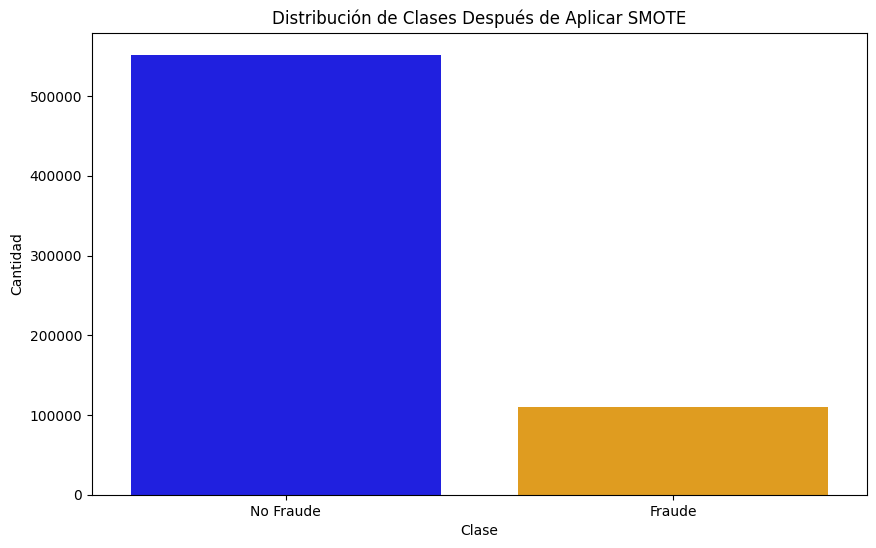

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Convertir la columna 'trans_date_trans_time' a tipo datetime
df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionar los datos correspondientes al año 2019
year_2019_data = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2019]

# Separar características y variable objetivo
X = year_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionar solo las columnas numéricas
y = year_2019_data['is_fraud']  # Variable objetivo

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

# Crear el objeto SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustar y aplicar el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()


DNN WITH RANDOM FOREST FOR 2019


Epoch 1/5


c:\Users\eduar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2168/2168 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9953 - loss: 0.0397 - val_accuracy: 0.9961 - val_loss: 0.0158
Epoch 2/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0158 - val_accuracy: 0.9964 - val_loss: 0.0145
Epoch 3/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9967 - loss: 0.0139 - val_accuracy: 0.9965 - val_loss: 0.0142
Epoch 4/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9967 - loss: 0.0132 - val_accuracy: 0.9965 - val_loss: 0.0130
Epoch 5/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9968 - loss: 0.0122 - val_accuracy: 0.9966 - val_loss: 0.0126
5781/5781 ━━━━━━━━━━━━━━━━━━━━ 4s 615us/step - accuracy: 0.9968 - loss: 0.0123
DNN Test accuracy: 0.9966697096824646
5781/5781 ━━━━━━━━━━━━━━━━━━━━ 3s 568us/step
Random Forest Test Accuracy: 0.997486078823593
Random Forest AUC: 0.9703060110841194


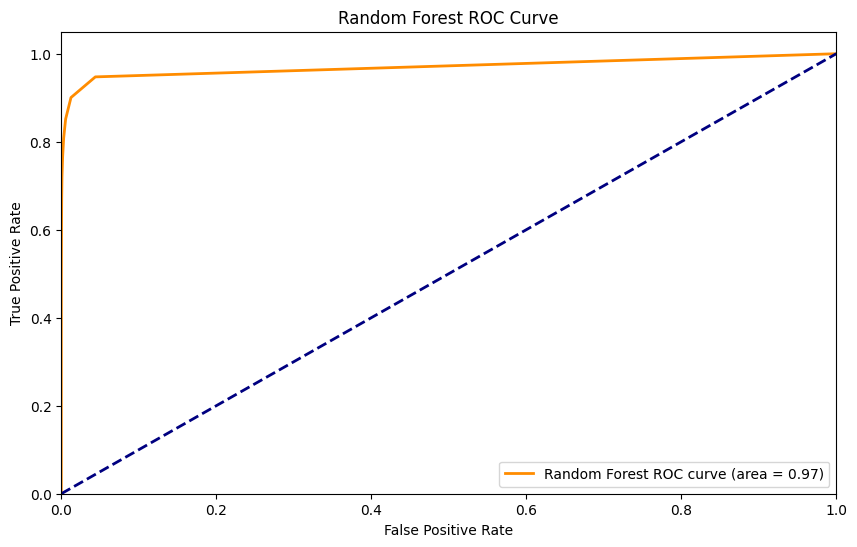

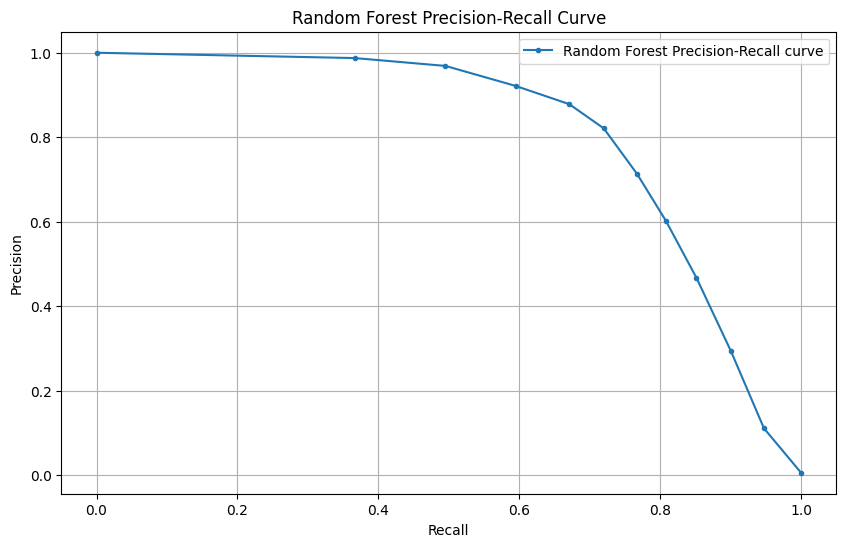

Random Forest Best Threshold: 0.6
Random Forest Best F1-score: 0.7671507260891338
Random Forest Precision at Best Threshold: 0.8210075026795284
Random Forest Recall at Best Threshold: 0.7199248120300752
Random Forest Precision with Optimal Threshold: 0.8782287822878229
Random Forest Recall with Optimal Threshold: 0.6710526315789473
Random Forest F1-score with Optimal Threshold: 0.7607884922749067
Random Forest Confusion Matrix:
 [[183807     99]
 [   350    714]]


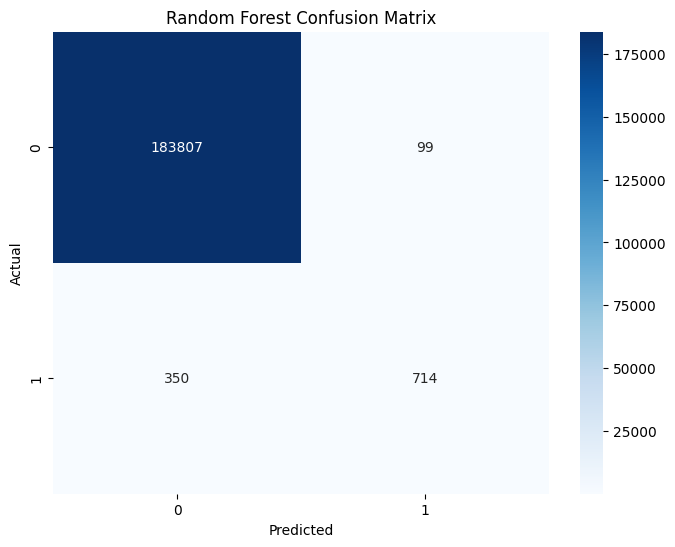

Random Forest Model saved as "random_forest_model.joblib"
DNN Model saved as "dnn_model.h5"


In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns
import joblib

# Asegurando que los datos tengan la forma correcta
X_entreno = X_entreno.reshape((X_entreno.shape[0], X_entreno.shape[1]))
X_desarrollo = X_desarrollo.reshape((X_desarrollo.shape[0], X_desarrollo.shape[1]))
X_prueba = X_prueba.reshape((X_prueba.shape[0], X_prueba.shape[1]))

# Definición del modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_entreno.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo DNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo DNN
history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=256, validation_data=(X_desarrollo, y_desarrollo))

# Evaluación del modelo DNN en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_prueba, y_prueba)
print('DNN Test accuracy:', test_acc)

# Predicción de probabilidades en el conjunto de prueba usando DNN
y_pred_prob_dnn = model.predict(X_prueba)

# Definición del clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Entrenamiento del clasificador Random Forest
rf_classifier.fit(X_train_res, y_train_res)

# Predicción de clases en el conjunto de prueba usando Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluación del clasificador Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Test Accuracy:', accuracy_rf)

# Predicción de probabilidades en el conjunto de prueba usando Random Forest
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Cálculo de la curva ROC y el AUC para Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print('Random Forest AUC:', roc_auc_rf)

# Gráfico de la curva ROC para Random Forest
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Cálculo y gráfico de la curva Precision-Recall para Random Forest
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del umbral que maximiza el F1-score para Random Forest
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_idx_rf = np.argmax(f1_scores_rf)
best_threshold_rf = thresholds_pr_rf[best_idx_rf]
best_f1_rf = f1_scores_rf[best_idx_rf]
best_precision_rf = precision_rf[best_idx_rf]
best_recall_rf = recall_rf[best_idx_rf]

print(f'Random Forest Best Threshold: {best_threshold_rf}')
print(f'Random Forest Best F1-score: {best_f1_rf}')
print(f'Random Forest Precision at Best Threshold: {best_precision_rf}')
print(f'Random Forest Recall at Best Threshold: {best_recall_rf}')

# Predicciones de clases usando el umbral óptimo para Random Forest
y_pred_optimal_rf = (y_pred_prob_rf > best_threshold_rf).astype(int)

# Cálculo de precisión, recall y F1-score con el umbral óptimo para Random Forest
optimal_precision_rf = precision_score(y_test, y_pred_optimal_rf)
optimal_recall_rf = recall_score(y_test, y_pred_optimal_rf)
optimal_f1_rf = f1_score(y_test, y_pred_optimal_rf)

print(f'Random Forest Precision with Optimal Threshold: {optimal_precision_rf}')
print(f'Random Forest Recall with Optimal Threshold: {optimal_recall_rf}')
print(f'Random Forest F1-score with Optimal Threshold: {optimal_f1_rf}')

# Cálculo de la matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_optimal_rf)
print('Random Forest Confusion Matrix:\n', conf_matrix_rf)

# Gráfico de la matriz de confusión para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Guardado del modelo entrenado de Random Forest
joblib.dump(rf_classifier, 'random_forest_model.joblib')
print('Random Forest Model saved as "random_forest_model.joblib"')

# Guardado del modelo entrenado de DNN
model.save('dnn_model.h5')
print('DNN Model saved as "dnn_model.h5"')


RE ENTRENAMIENTO DNN W RANDOM FOREST PARA 2020

C:\Users\eduar\AppData\Local\Temp\ipykernel_16808\3754627938.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette=['blue', 'orange'])


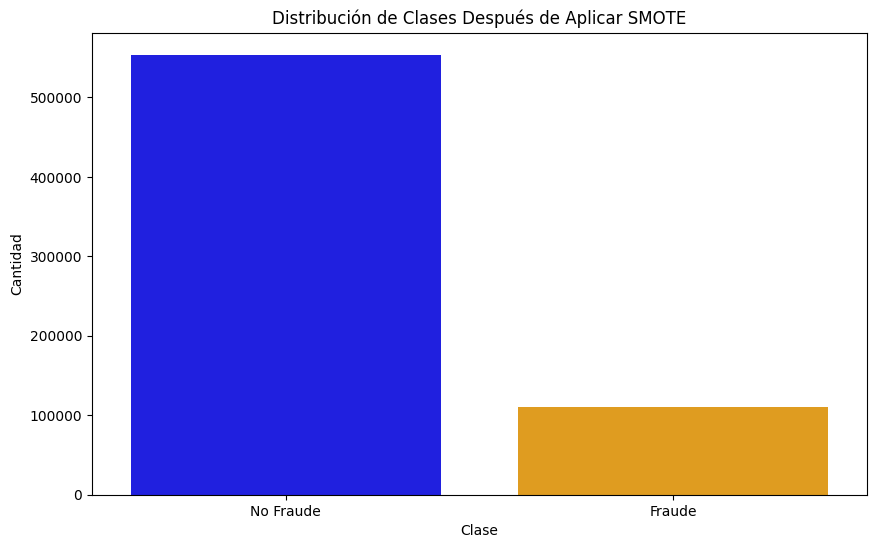

Epoch 1/5


c:\Users\eduar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2168/2168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0478 - val_accuracy: 0.9961 - val_loss: 0.0161
Epoch 2/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0153 - val_accuracy: 0.9965 - val_loss: 0.0149
Epoch 3/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9967 - loss: 0.0135 - val_accuracy: 0.9965 - val_loss: 0.0140
Epoch 4/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9967 - loss: 0.0133 - val_accuracy: 0.9964 - val_loss: 0.0132
Epoch 5/5
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9967 - loss: 0.0127 - val_accuracy: 0.9969 - val_loss: 0.0126
5781/5781 ━━━━━━━━━━━━━━━━━━━━ 3s 599us/step - accuracy: 0.9968 - loss: 0.0128
DNN Test accuracy: 0.9968318939208984
5781/5781 ━━━━━━━━━━━━━━━━━━━━ 3s 531us/step
Random Forest Test Accuracy: 0.9976982248839679
Random Forest AUC: 0.9644507741881652


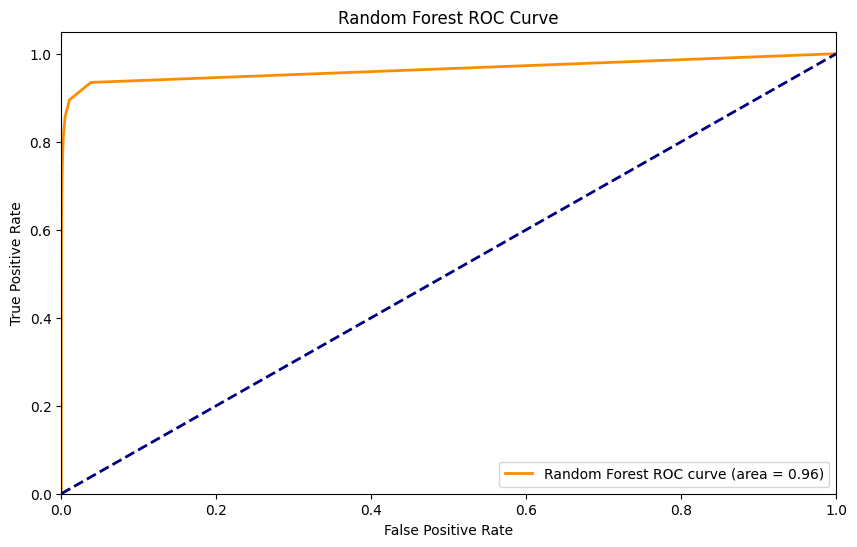

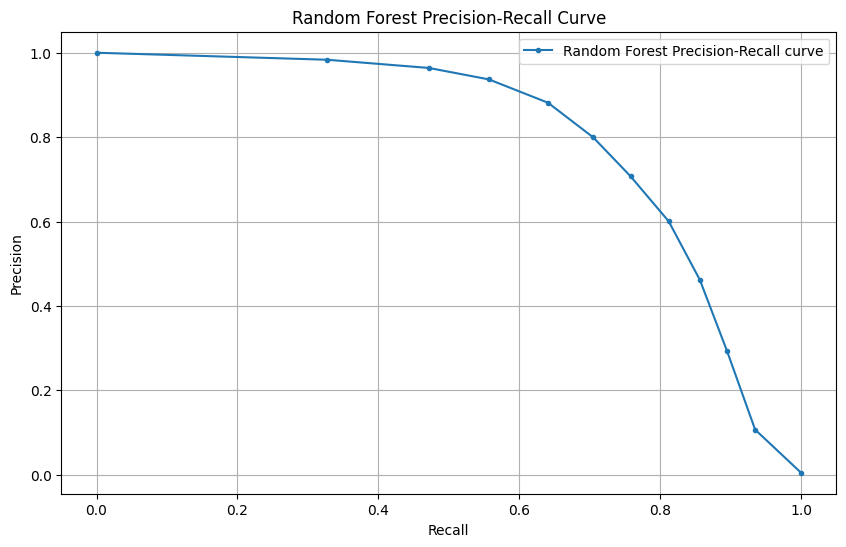

Random Forest Best Threshold: 0.6
Random Forest Best F1-score: 0.7492660011743982
Random Forest Precision at Best Threshold: 0.7994987468671679
Random Forest Recall at Best Threshold: 0.7049723756906078
Random Forest Precision with Optimal Threshold: 0.8814589665653495
Random Forest Recall with Optimal Threshold: 0.6408839779005525
Random Forest F1-score with Optimal Threshold: 0.7421625079974408
Random Forest Confusion Matrix:
 [[184526     78]
 [   325    580]]


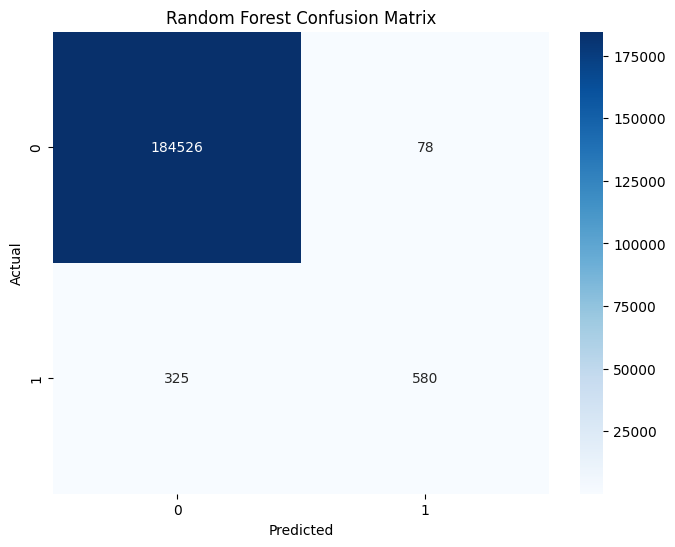

Random Forest Model saved as "random_forest_model.joblib"
DNN Model saved as "dnn_model.h5"


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Convertir la columna 'trans_date_trans_time' a tipo datetime
df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionar los datos correspondientes al año 2019
year_2019_data = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2020]

# Separar características y variable objetivo
X = year_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionar solo las columnas numéricas
y = year_2019_data['is_fraud']  # Variable objetivo

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

# Crear el objeto SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustar y aplicar el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns
import joblib

# Asegurando que los datos tengan la forma correcta
X_entreno = X_entreno.reshape((X_entreno.shape[0], X_entreno.shape[1]))
X_desarrollo = X_desarrollo.reshape((X_desarrollo.shape[0], X_desarrollo.shape[1]))
X_prueba = X_prueba.reshape((X_prueba.shape[0], X_prueba.shape[1]))

# Definición del modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_entreno.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo DNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo DNN
history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=256, validation_data=(X_desarrollo, y_desarrollo))

# Evaluación del modelo DNN en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_prueba, y_prueba)
print('DNN Test accuracy:', test_acc)

# Predicción de probabilidades en el conjunto de prueba usando DNN
y_pred_prob_dnn = model.predict(X_prueba)

# Definición del clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Entrenamiento del clasificador Random Forest
rf_classifier.fit(X_train_res, y_train_res)

# Predicción de clases en el conjunto de prueba usando Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluación del clasificador Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Test Accuracy:', accuracy_rf)

# Predicción de probabilidades en el conjunto de prueba usando Random Forest
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Cálculo de la curva ROC y el AUC para Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print('Random Forest AUC:', roc_auc_rf)

# Gráfico de la curva ROC para Random Forest
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Cálculo y gráfico de la curva Precision-Recall para Random Forest
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del umbral que maximiza el F1-score para Random Forest
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_idx_rf = np.argmax(f1_scores_rf)
best_threshold_rf = thresholds_pr_rf[best_idx_rf]
best_f1_rf = f1_scores_rf[best_idx_rf]
best_precision_rf = precision_rf[best_idx_rf]
best_recall_rf = recall_rf[best_idx_rf]

print(f'Random Forest Best Threshold: {best_threshold_rf}')
print(f'Random Forest Best F1-score: {best_f1_rf}')
print(f'Random Forest Precision at Best Threshold: {best_precision_rf}')
print(f'Random Forest Recall at Best Threshold: {best_recall_rf}')

# Predicciones de clases usando el umbral óptimo para Random Forest
y_pred_optimal_rf = (y_pred_prob_rf > best_threshold_rf).astype(int)

# Cálculo de precisión, recall y F1-score con el umbral óptimo para Random Forest
optimal_precision_rf = precision_score(y_test, y_pred_optimal_rf)
optimal_recall_rf = recall_score(y_test, y_pred_optimal_rf)
optimal_f1_rf = f1_score(y_test, y_pred_optimal_rf)

print(f'Random Forest Precision with Optimal Threshold: {optimal_precision_rf}')
print(f'Random Forest Recall with Optimal Threshold: {optimal_recall_rf}')
print(f'Random Forest F1-score with Optimal Threshold: {optimal_f1_rf}')

# Cálculo de la matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_optimal_rf)
print('Random Forest Confusion Matrix:\n', conf_matrix_rf)

# Gráfico de la matriz de confusión para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Guardado del modelo entrenado de Random Forest
joblib.dump(rf_classifier, 'random_forest_model.joblib')
print('Random Forest Model saved as "random_forest_model.joblib"')

# Guardado del modelo entrenado de DNN
model.save('dnn_model.h5')
print('DNN Model saved as "dnn_model.h5"')




Para el modelo Random Forest:

Validación de identidad: Considera la posibilidad de incorporar variables sintéticas relacionadas con la validación de identidad, como la verificación de nombres y números de identificación en diferentes fuentes públicas en línea. Esto puede ayudar a identificar individuos más susceptibles a la usurpación de identidad, lo que podría mejorar la detección de fraudes.

Mejora de motores de reglas: Revisa y actualiza los motores de reglas para identificar las reglas obsoletas y mejorar las existentes. Esto proporcionaría una mejor alimentación de datos para el modelo y potencialmente mejoraría su rendimiento.

Tamaño del conjunto de datos: Siempre que sea posible, utiliza conjuntos de datos más grandes para entrenar el modelo. Cuantos más datos tengas, mejor podrá generalizar el modelo y, en consecuencia, mejorar su rendimiento.

Técnicas de evaluación adicionales: Considera el uso de métricas adicionales como coeficientes de Kappa o Alfa para evaluar el rendimiento del modelo de detección de fraude.

Para el modelo de Redes Neuronales:

Integración de técnicas de aprendizaje profundo: Explora la integración de técnicas de aprendizaje profundo como Convolutional Neural Networks (CNN) y Recurrent Neural Networks (RNN) para mejorar la precisión y el rendimiento del modelo.

Detección de outliers y reducción de dimensionalidad: Utiliza algoritmos de detección de outliers y técnicas de reducción de dimensionalidad para identificar patrones anómalos en los datos y mejorar la capacidad del modelo para detectar fraudes.

Procesamiento del lenguaje natural (NLP): Incorpora técnicas de procesamiento del lenguaje natural (NLP) para analizar y comprender mejor los comentarios y descripciones de los usuarios en las plataformas digitales. Esto puede proporcionar información adicional para mejorar la detección de fraudes.

Generación de adversarios: Evalúa la robustez y la capacidad de detección del modelo frente a ataques maliciosos utilizando técnicas de generación de adversarios.

Técnicas de evaluación adicionales: Al igual que con el modelo Random Forest, considera el uso de métricas adicionales como coeficientes de Kappa o Alfa para evaluar el rendimiento del modelo de Redes Neuronales en la detección de fraude.

Estas sugerencias pueden ayudar a mejorar los modelos existentes y a aumentar su eficacia en la detección de fraudes en tarjetas de crédito.